# Video Game Sales
## Grupo
Celso Netto, Maria Eduarda de Almeida, Matheus Freitas, Maurício Fonseca, Pedro Henrique Pinto, Rafael Ferreira Canto.
## Instruções
- Descreva o conjunto de dados, incluindo informações sobre as variáveis, tipo de dados e o contexto em que foi coletado.
- Formule no mínimo cinco perguntas que deseja responder com a análise. As perguntas devem ser relevantes e orientadas por hipóteses que possam ser exploradas nos dados.
- Crie visualizações (como gráficos de barras, histogramas, boxplots, gráficos de dispersão) para ilustrar os principais achados e responder às perguntas formuladas.
- Apresente as conclusões obtidas a partir da análise, destacando insights importantes e possíveis recomendações.
- Prepare uma apresentação em formato de slides que cubra os tópicos acima.

## Modelagem
Foi feito um bloco de código que permite carregar o dataset tanto pelo Drive como pelo arquivo local. Em cima disso, foi feita uma análise exploratória com um viés histórico, buscando entender a derivada dessas informações no passar do tempo. Foram respondidas as seguintes perguntas:

1. Qual é a relação entre os top 20 jogos mais vendidos e a marca do jogo?
2. Quais são os tipos de jogos que são mais vendidos na América do Norte, no Japão e na Europa?
3. Existe alguma relação entre a plataforma em que o jogo é disponibilizado e o número de vendas?
4. Existe alguma relação entre o ano de lançamento do jogo e a sua quantidade de vendas?
5. Quais são os gêneros de jogo com maior número de vendas globalmente?

In [ ]:
# Dependências

from google.colab import drive
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

'''
https://www.kaggle.com/datasets/gregorut/videogamesales
'''

opcao = int(input("Importar dataset <vgsales.csv>:\n" +
                "\t1) Do Drive?\n" +
                "\t2) Da sessão local?\n" +
                "\t0) SAIR\n" +
                "> "))
if opcao == 1:
    drive.mount("/content/drive")
    df = pd.read_csv("drive/My Drive/vgsales.csv")
    drive.flush_and_unmount()
elif opcao == 2:
    df = pd.read_csv("vgsales.csv")
df

Importar dataset <vgsales.csv>:
	1) Do Drive?
	2) Da sessão local?
	0) SAIR
> 2


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


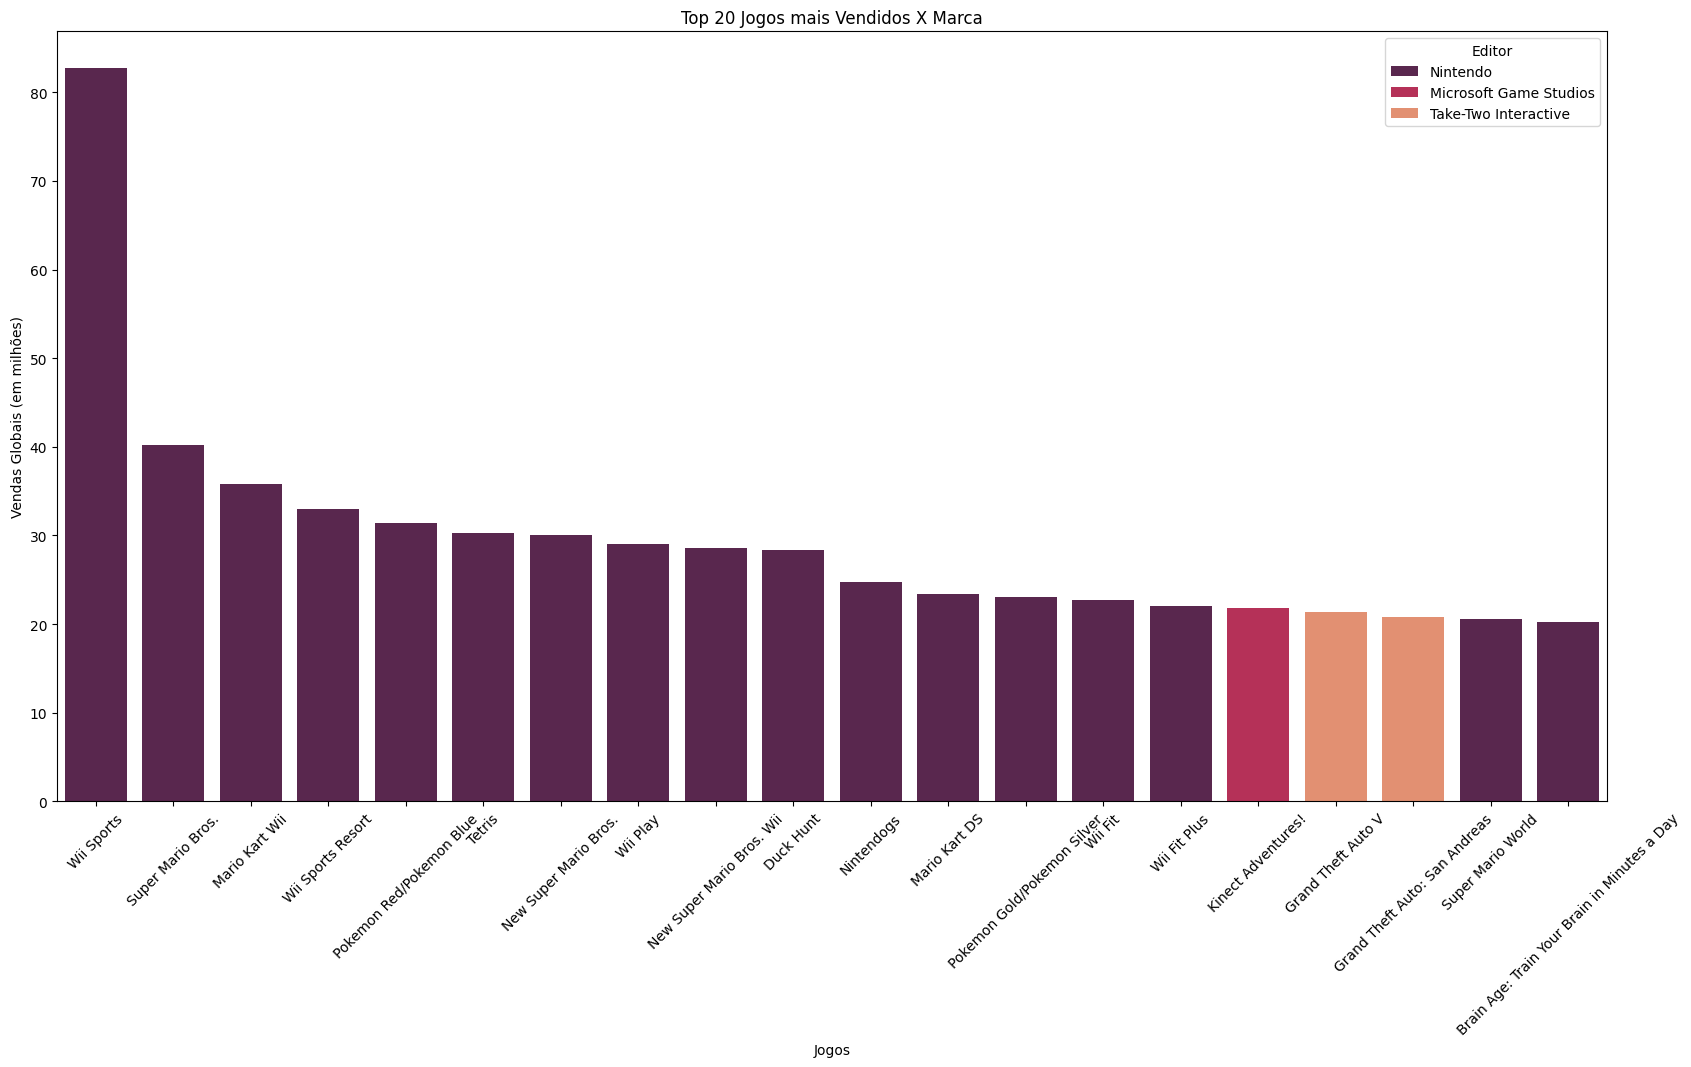

O gráfico mostra que a maioria dos jogos com o maior número de vendas ao redor do mundo são distribuídos pela Nintendo.
 Um adendo importante: as informações do dataset não estão atualizadas, pois a última atualização foi feita em 2016.
 Portanto, as informações contidas aqui são válidas até o ano de 2016.
 Nesse período, os jogos que utilizavam sensor de movimento eram novidade, o que justifica o altíssimo número de vendas do Wii Sports.


In [ ]:
# Qual é a relação entre os top 20 jogos mais vendidos e a marca do jogo?

top_games = df.sort_values(by='Global_Sales', ascending=False).head(20)

plt.figure(figsize=(20, 10))

sns.barplot(x='Name', y='Global_Sales', data=top_games, hue="Publisher", palette="rocket")

plt.xticks(rotation=45)
plt.title('Top 20 Jogos mais Vendidos X Marca')
plt.xlabel('Jogos')
plt.ylabel('Vendas Globais (em milhões)')
plt.legend(title='Editor')
plt.show()
print("O gráfico mostra que a maioria dos jogos com o maior número de vendas ao redor do mundo são distribuídos pela Nintendo.\n",
      "Um adendo importante: as informações do dataset não estão atualizadas, pois a última atualização foi feita em 2016.\n",
      "Portanto, as informações contidas aqui são válidas até o ano de 2016.\n",
      "Nesse período, os jogos que utilizavam sensor de movimento eram novidade, o que justifica o altíssimo número de vendas do Wii Sports.")

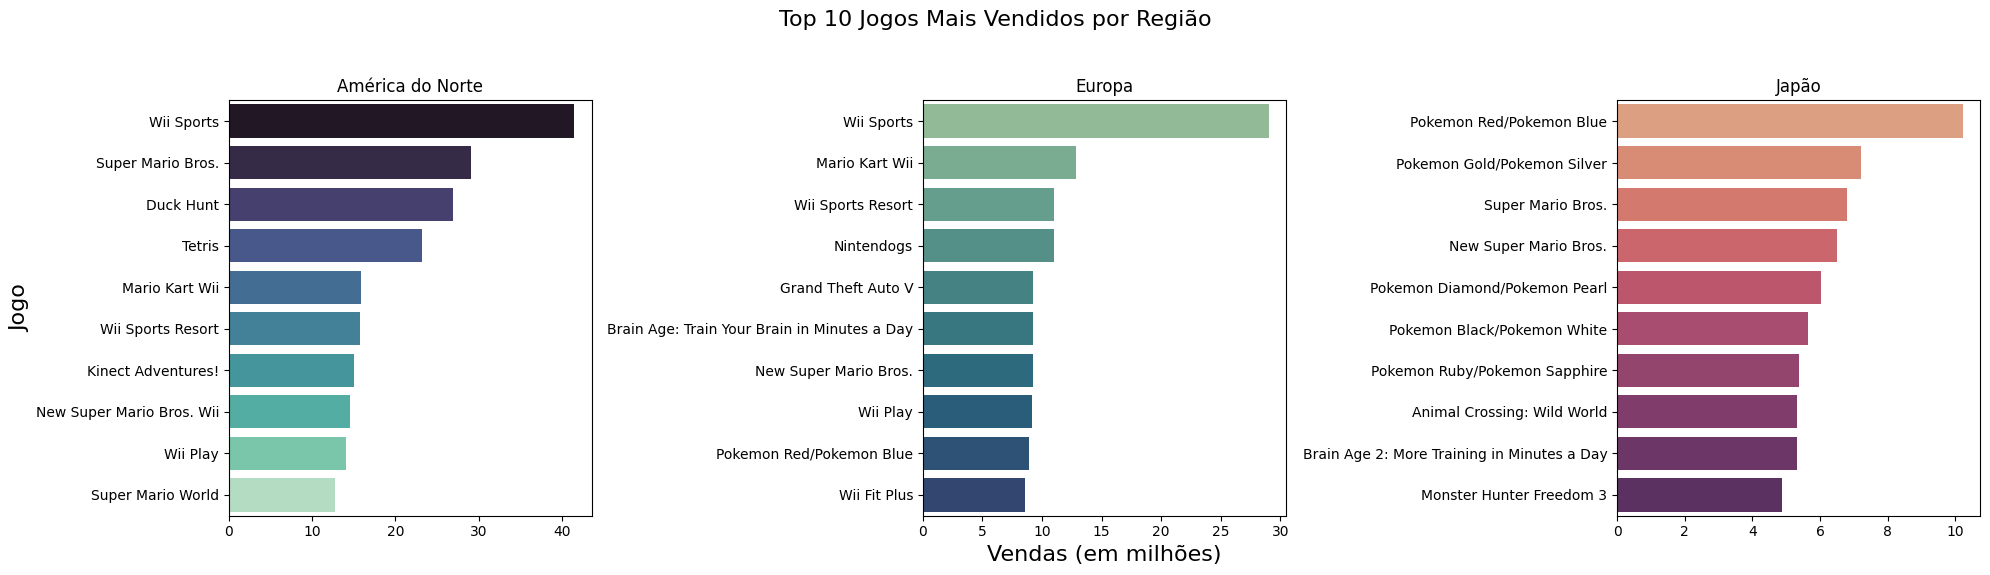

Analisando os gráficos, percebe-se que, em todas as regiões averiguadas, há a predominância dos jogos da Nintendo em número de vendas.

Além disso, podemos observar que a popularidade da série Pokémon é bem mais expressiva no Japão do que na Europa e na América do Norte, já que 5 jogos da série estão no Top 10 do país asiático.
 Em comparação, tanto na América do Norte quanto na Europa, existe apenas 1 jogo da série Pokémon no Top 10.


In [ ]:
# Quais são os tipos de jogos que são mais vendidos na América do Norte, no Japão e na Europa?

na_sales = df.sort_values('NA_Sales', ascending=False).head(10)
eu_sales = df.sort_values('EU_Sales', ascending=False).head(10)
jp_sales = df.sort_values('JP_Sales', ascending=False).head(10)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Top 10 Jogos Mais Vendidos por Região', fontsize=16)

sns.barplot(ax=axes[0], x='NA_Sales', y='Name', data=na_sales, hue='Name', palette='mako')
axes[0].set_title('América do Norte')
axes[0].set_xlabel('')
axes[0].set_ylabel('Jogo', fontsize=16, rotation=90)

sns.barplot(ax=axes[1], x='EU_Sales', y='Name', data=eu_sales, hue='Name', palette='crest')
axes[1].set_title('Europa')
axes[1].set_xlabel('Vendas (em milhões)', fontsize=16)
axes[1].set_ylabel('')

sns.barplot(ax=axes[2], x='JP_Sales', y='Name', data=jp_sales, hue='Name', palette='flare')
axes[2].set_title('Japão')
axes[2].set_xlabel('')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("Analisando os gráficos, percebe-se que, em todas as regiões averiguadas, há a predominância dos jogos da Nintendo em número de vendas.\n")
print("Além disso, podemos observar que a popularidade da série Pokémon é bem mais expressiva no Japão do que na Europa e na América do Norte, já que 5 jogos da série estão no Top 10 do país asiático.\n",
      "Em comparação, existe apenas 1 jogo da série Pokémon no Top 10 da Europa e nenhum no ranking da América do Norte.")

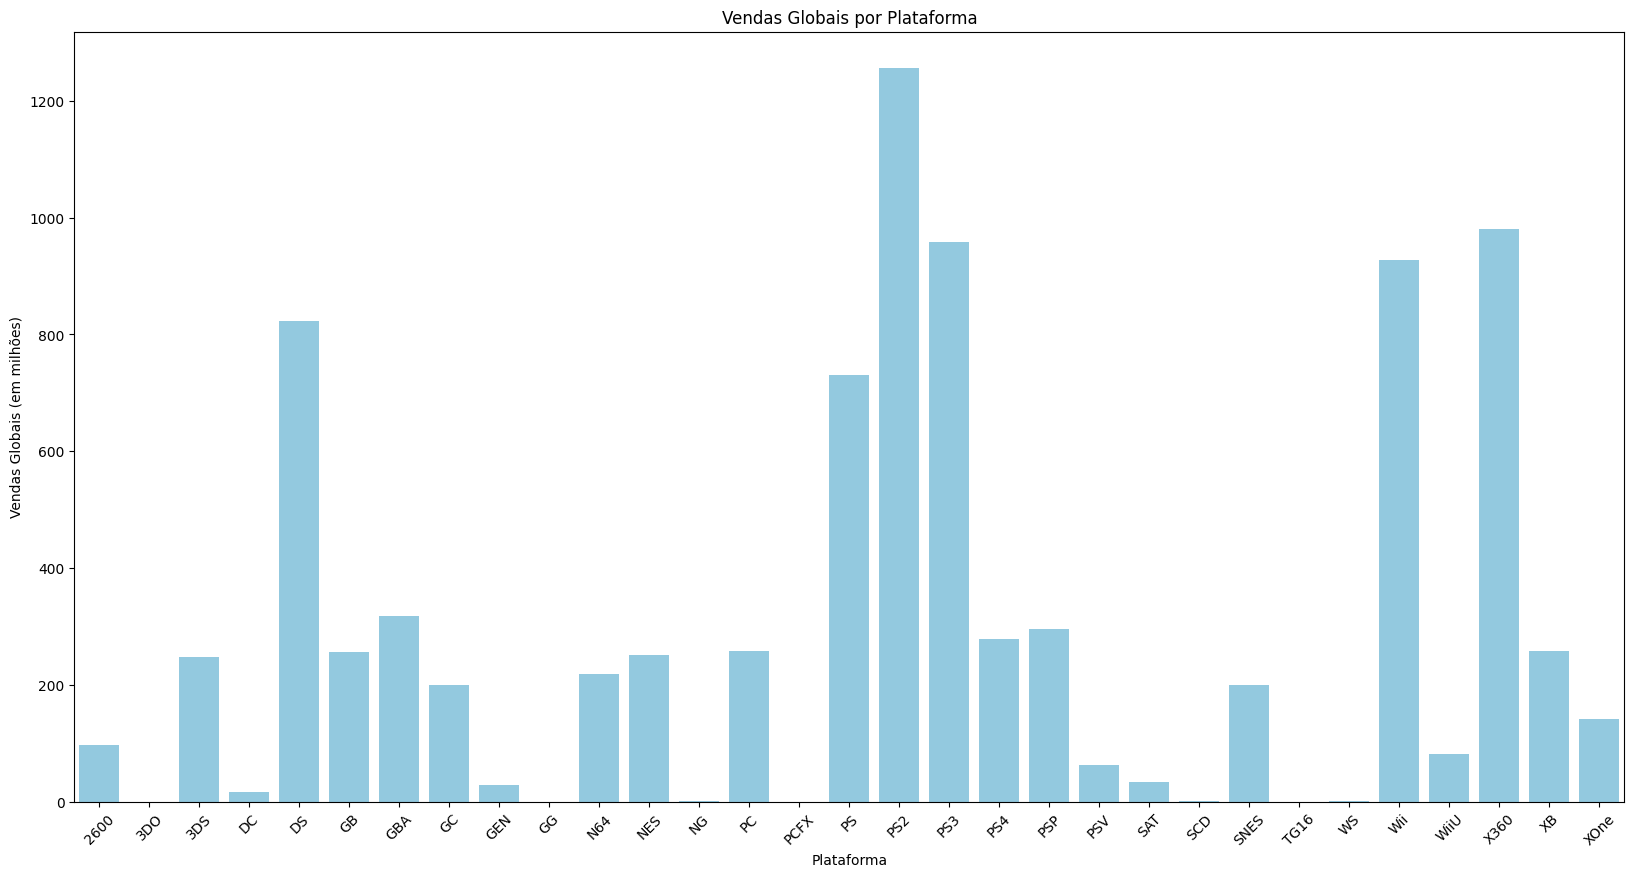

Através do gráfico, percebe-se que os consoles com maior número de vendas são: 
 	> PS2;
 	> X360;
 	> PS3;
 	> Wii;
 Existem algumas plataformas que tiveram vendas inexpressivas, como o PCFX, o GG, o 3DO e o TG16. Todas essas plataformas têm em comum o fato de terem sido lançadas na década de 90.
 Observação: os dados estão atualizados até 2016, por isso que alguns consoles atuais não estão no dataset, como o PS5 e os XBOX Series X e S.


In [ ]:
# Existe alguma relação entre a plataforma em que os jogos são disponibilizados e o número de vendas?
platforms = df.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(20, 10))

sns.barplot(x=platforms.index, y=platforms.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()
print("Através do gráfico, percebe-se que os consoles com maior número de vendas são: \n",
      "\t> PS2;\n",
      "\t> X360;\n",
      "\t> PS3;\n",
      "\t> Wii;\n",
      "Existem algumas plataformas que tiveram vendas inexpressivas, como o PCFX, o GG, o 3DO e o TG16. Todas essas plataformas têm em comum o fato de terem sido lançadas na década de 90.\n",
      "Observação: os dados estão atualizados até 2016, por isso que alguns consoles atuais não estão no dataset, como o PS5 e os XBOX Series X e S."
)

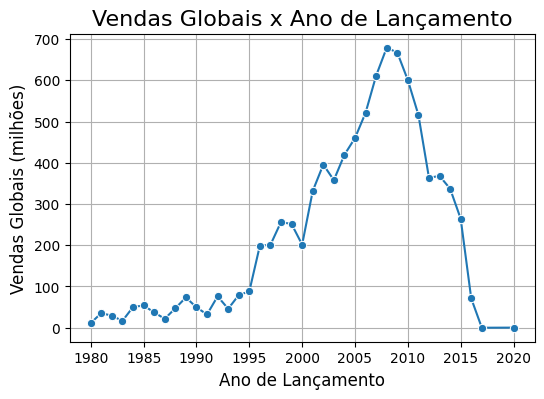

Ou seja, existe sim uma relação clara entre essas duas variáveis. Jogos lançados nos anos 2000 tiveram um tempo maior de mercado que aqueles lançados a partir de 2010, o que justifica a quantidade total de vendas maior;  entretanto, é evidente que esses dois grupos ainda saem em disparada à frente em relação à performance média anual antes do PlayStation 1 (1994)


In [ ]:
# Existe alguma relação entre o ano de lançamento do jogo e a sua quantidade de vendas?
vendasGlobais_ano = df.groupby("Year")["Global_Sales"].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(x="Year", y="Global_Sales", data=vendasGlobais_ano, marker="o")
plt.title("Vendas Globais x Ano de Lançamento", fontsize=16)
plt.xlabel("Ano de Lançamento", fontsize=12)
plt.ylabel("Vendas Globais (milhões)", fontsize=12)
plt.grid(True)
plt.show()

print("Ou seja, existe sim uma relação clara entre essas duas variáveis.",
"Jogos lançados nos anos 2000 tiveram um tempo maior de mercado que aqueles lançados a partir de 2010, o que justifica a quantidade total de vendas maior; ",
"entretanto, é evidente que esses dois grupos ainda saem em disparada à frente em relação à performance média anual antes do PlayStation 1 (1994)")

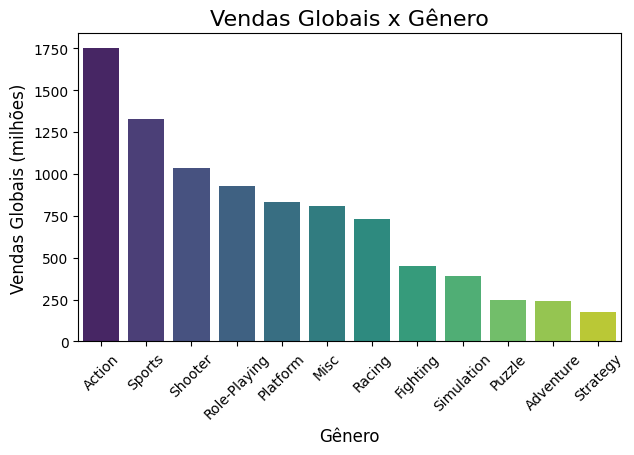

Com isso, é possível inferir diversas relações nessa dinâmica, como, por exemplo:
	> A revolução do Wii Remote/Kinect - sensores que permitiram uma sensação de imersão maior para os usuários -
	> aumento no hype em torno do futebol, com jogos como Bomba Patch, PES e FIFA (antigo EA FC)
com o crescimento nas vendas da categoria Sports, o que se comprova ao verificar o gráfico para antes dos anos 2000.

Eram pouco populares temas como jogos de tiro, visto que eram pouco divertidos em um cenário 2D; o oposto do que se verifica para jogos de plataforma, como os clássicos Sonic e Mario.


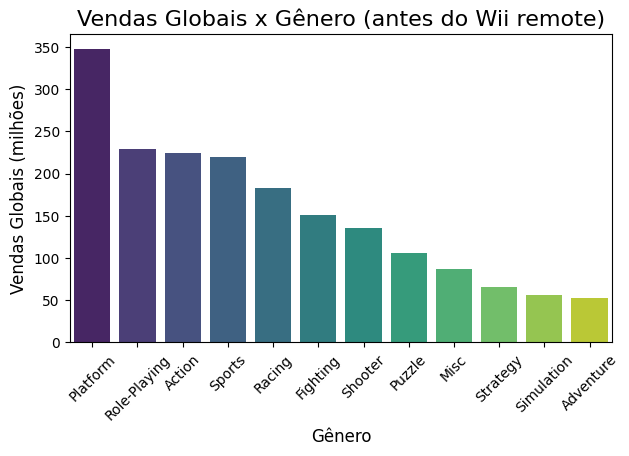

In [ ]:
# Quais são os gêneros de jogo com maior número de vendas globalmente?
vendasGlobais_genero = (
    df.groupby("Genre")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Global_Sales", ascending = False)
)

plt.figure(figsize=(7, 4))
sns.barplot(x="Genre", y="Global_Sales", data=vendasGlobais_genero, hue="Genre", palette='viridis')
plt.title("Vendas Globais x Gênero", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Vendas Globais (milhões)", fontsize=12)
plt.show()

print("Com isso, é possível inferir diversas relações nessa dinâmica, como, por exemplo:\n"
    "\t> A revolução do Wii Remote/Kinect - sensores que permitiram uma sensação de imersão maior para os usuários -\n"
    "\t> aumento no hype em torno do futebol, com jogos como Bomba Patch, PES e FIFA (antigo EA FC)\n"
    "com o crescimento nas vendas da categoria Sports, o que se comprova ao verificar o gráfico para antes dos anos 2000.\n"
    "\nEram pouco populares temas como jogos de tiro, visto que eram pouco divertidos em um cenário 2D; o oposto do que se verifica para jogos de plataforma, como os clássicos Sonic e Mario.")

df_pre2000 = df[df['Year'] <= 2000]
vendasGlobais_genero = (
    df_pre2000.groupby("Genre")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Global_Sales", ascending = False)
)

plt.figure(figsize=(7, 4))
sns.barplot(x="Genre", y="Global_Sales", data=vendasGlobais_genero, hue="Genre", palette='viridis')
plt.title("Vendas Globais x Gênero (antes do Wii remote)", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Vendas Globais (milhões)", fontsize=12)
plt.show()